# Laboratorio 6

* Asuma que las operaciones requieren alta precisión.
* Presente su solución con el nombre `lab6_codigoPUCP.ipynb`

In [189]:
import numpy
ns = 2**numpy.arange(5,13)

print(ns)

print(ns[1])

[  32   64  128  256  512 1024 2048 4096]
64


a) Implementar (en un único archivo) cuatro funciones en C que acumulen los elementos de una matriz cuadrada de números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [190]:
%%file funciones_c.c

double elemento_1(double *arr, int N){
    double suma= 0.0;
    for(int i=0;i<=N*N;i++){

        suma= suma + arr[i];
    }
    return suma;
}

double elemento_2(double *arr, int N){
    double suma= 0.0;
    for(int i=0;i<=N*N;i=i+2){

        suma= suma + arr[i]+ arr[i+1];
    }
    return suma;
}

double elemento_4(double *arr, int N){
    double suma= 0.0;
    for(int i=0;i<=N*N;i=i+4){

        suma= suma + arr[i]+ arr[i+1]+ arr[i+2] + arr[i+3];
    }
    return suma;
}

double elemento_8(double *arr, int N){
    double suma= 0.0;
    for(int i=0;i<=N*N;i=i+8){

        suma= suma + arr[i]+ arr[i+1]+ arr[i+2] + arr[i+3] + arr[i+4]+ arr[i+5]+ arr[i+6] + arr[i+7];
    }
    return suma;
}

Overwriting funciones_c.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [191]:
#! gcc -c funciones_c.c -lm
#! gcc -shared parte_a.o -o parte_a.so

! gcc -shared -o funciones_c.so funciones_c.c

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [192]:
import ctypes
import numpy as np

def ctypes_funciones():

    lib = ctypes.CDLL('./funciones_c.so')

    lib.elemento_1.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),ctypes.c_int]
    lib.elemento_1.restype = ctypes.c_double

    lib.elemento_2.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),ctypes.c_int]
    lib.elemento_2.restype = ctypes.c_double

    lib.elemento_4.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),ctypes.c_int]
    lib.elemento_4.restype = ctypes.c_double

    lib.elemento_8.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),ctypes.c_int]
    lib.elemento_8.restype = ctypes.c_double

    return lib.elemento_1, lib.elemento_2, lib.elemento_4, lib.elemento_8

d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [193]:
elemento_1, elemento_2, elemento_4, elemento_8 =  ctypes_funciones()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. (0.25 ptos)

In [194]:
n = ns[0]
A = numpy.random.rand(n,n)
Y = A.flatten()

#Sin la instancia las funciones deben llamarse con lib.elemento1(Y,n) y no se define una funcion que contenga las 4 funciones

resultado1= elemento_1(Y,n)
print(resultado1)

resultado2= elemento_2(Y,n)
print(resultado2)

resultado4= elemento_4(Y,n)
print(resultado4)

resultado8= elemento_8(Y,n)
print(resultado8)

516.0827664445258
516.0827664445258
516.0827664445258
516.0827664445258


f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. (0.25 ptos)

In [195]:
n = ns[-1]
A = numpy.random.rand(n,n)
Y = A.flatten()

resultado1= elemento_1(Y,n)
print(resultado1)

resultado2= elemento_2(Y,n)
print(resultado2)

resultado4= elemento_4(Y,n)
print(resultado4)

resultado8= elemento_8(Y,n)
print(resultado8)


8388950.0550196
8388950.0550196
8388950.0550196
8388950.0550196


g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [196]:
import time
import matplotlib.pyplot as plt
import statistics


lista_funcion1_N = []
lista_funcion2_N = []
lista_funcion3_N = []
lista_funcion4_N = []

for size in ns:

    iteraciones = 50
    lista_func1 = []
    lista_func2 = []
    lista_func3 = []
    lista_func4 = []    

    A = numpy.random.rand(size,size)
    Y = A.flatten()
    
    for _ in range(iteraciones):
            
        tic_1 = time.perf_counter()
        elemento_1(Y,size)
        toc_1 = time.perf_counter()
        elemento_1(Y,size)
        tic_2 = time.perf_counter()
        elemento_4(Y,size)
        toc_2 = time.perf_counter()
        elemento_8(Y,size)
        tic_3 = time.perf_counter()

        #Guardo las 50 iteraciones en los arreglos lista_funcx
        lista_func1.append(toc_1-tic_1)
        lista_func2.append(tic_2-toc_1)
        lista_func3.append(toc_2-tic_2)
        lista_func4.append(tic_3-toc_2)

    # Voy guardando la mediana de las 50 tiempos tomadados a cada funcion para cada valor de ns
    lista_funcion1_N.append(statistics.median(lista_func1))
    lista_funcion2_N.append(statistics.median(lista_func2))
    lista_funcion3_N.append(statistics.median(lista_func3))
    lista_funcion4_N.append(statistics.median(lista_func4))

print(lista_funcion1_N)
#print(lista_funcion1_N[3:])
print(lista_funcion2_N)
print(lista_funcion3_N)

[2.1469500097737182e-05, 4.729449983642553e-05, 0.00013323949997356976, 0.0004669824998018157, 0.002066124499833677, 0.004954012999860424, 0.018958725499942375, 0.09298739449968707]
[2.1759500214102445e-05, 4.782599989994196e-05, 0.0001329320002696477, 0.0004906760000267241, 0.002017051000166248, 0.0049962575003519305, 0.019543771500138973, 0.09616642350010807]
[1.7932499758899212e-05, 3.4785500247380696e-05, 8.400349997828016e-05, 0.00028279349999138503, 0.001360610499887116, 0.002957491500183096, 0.011905864000254951, 0.0594870540003285]


h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

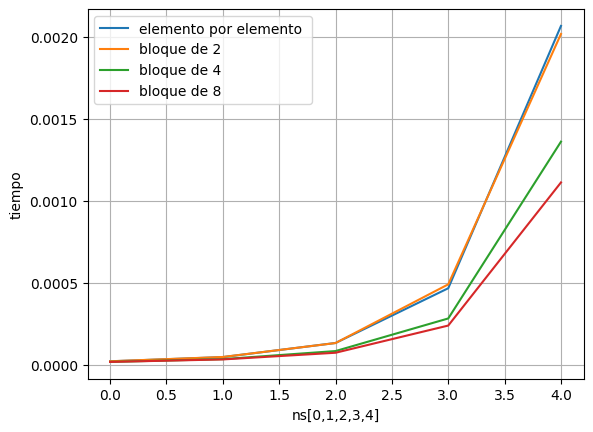

In [197]:
plt.plot([0,1,2,3,4],lista_funcion1_N[:5],label='elemento por elemento ')
plt.plot([0,1,2,3,4],lista_funcion2_N[:5],label='bloque de 2')
plt.plot([0,1,2,3,4],lista_funcion3_N[:5],label='bloque de 4')
plt.plot([0,1,2,3,4],lista_funcion4_N[:5],label='bloque de 8')
plt.xlabel("ns[0,1,2,3,4]")
plt.ylabel("tiempo")
plt.grid()
plt.legend()

i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

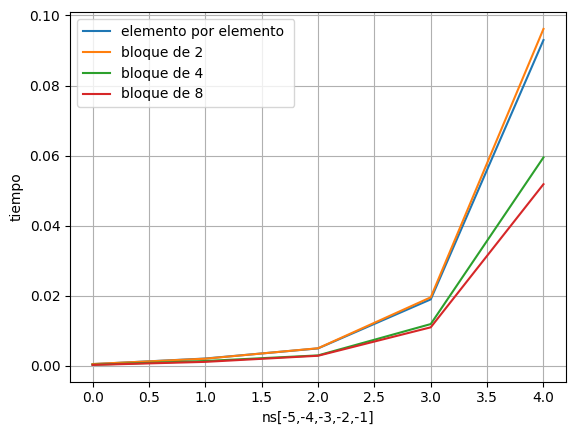

In [198]:
# como ns= [  32   64  128  256  512 1024 2048 4096], entonces como debemos medir el tiempo para los ultimos 5 valores
# hacemos 3: porque toma desde el ns[3] hacia adelante, entonces toma 5 valores

plt.plot([0,1,2,3,4],lista_funcion1_N[3:],label='elemento por elemento ')
plt.plot([0,1,2,3,4],lista_funcion2_N[3:],label='bloque de 2')
plt.plot([0,1,2,3,4],lista_funcion3_N[3:],label='bloque de 4')
plt.plot([0,1,2,3,4],lista_funcion4_N[3:],label='bloque de 8')
plt.xlabel("ns[-5,-4,-3,-2,-1]")
plt.ylabel("tiempo")
plt.grid()
plt.legend()

j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

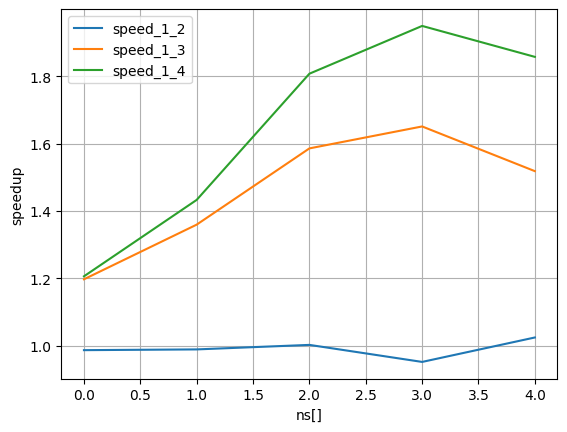

In [199]:
#Funcion más lenta: funcion que acumula elemento a elemento pues tiene mayor media de tiempo de ejecusion

speed1_2 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion2_N)]
speed1_3 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion3_N)]
speed1_4= [i / j for i, j in zip(lista_funcion1_N, lista_funcion4_N)]

plt.plot([0,1,2,3,4],speed1_2[:5],label='speed_1_2')
plt.plot([0,1,2,3,4],speed1_3[:5],label='speed_1_3')
plt.plot([0,1,2,3,4],speed1_4[:5],label='speed_1_4')

plt.xlabel("ns[]")
plt.ylabel("speedup")
plt.grid()
plt.legend()

k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

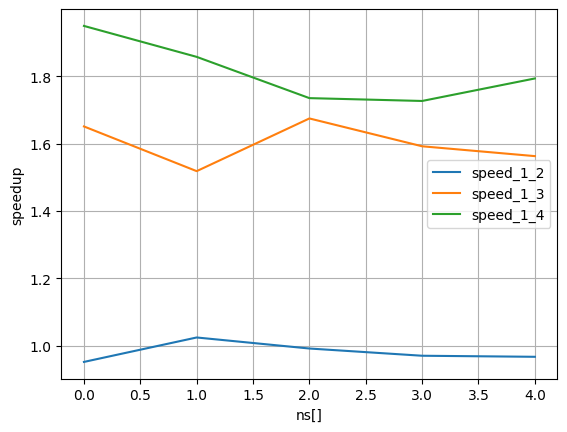

In [200]:
speed1_2 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion2_N)]
speed1_3 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion3_N)]
speed1_4= [i / j for i, j in zip(lista_funcion1_N, lista_funcion4_N)]

plt.plot([0,1,2,3,4],speed1_2[3:],label='speed_1_2')
plt.plot([0,1,2,3,4],speed1_3[3:],label='speed_1_3')
plt.plot([0,1,2,3,4],speed1_4[3:],label='speed_1_4')

plt.xlabel("ns[]")
plt.ylabel("speedup")
plt.grid()
plt.legend()

l) Implementar (en un único archivo) dos funciones en C que acumulen los elementos de una matriz cuadrada de números reales. Debe emplear dos bucle `for`. En la primera función realizar la acumulación leyendo los elementos por filas, en la segunda acumule leyendo los elementos por columnas. (1.5 ptos)

In [201]:
%%file funciones2_c.c

double acumulacion_filas( double* arr, int N){

    double suma= 0.0;
    for(int i=0;i<=N;i++){
        for(int j=0;j<=N;j++){

            suma = suma + arr[3*i+j];
        }
    }
    return suma;

}

double acumulacion_columnas( double* arr, int N){

    double suma= 0.0;
    for(int i=0;i<=N;i++){
        for(int j=0;j<=N;j++){

            suma = suma + arr[3*j + i];
        }
    }
    return suma;

}


Overwriting funciones2_c.c


m) Coloque el comando para generar la librería dinámica del ítem (l) y genere la librería dinámica. (0.25 ptos)

In [202]:
#! gcc -c funciones_c.c -lm
#! gcc -shared parte_a.o -o parte_a.so

! gcc -shared -o funciones2_c.so funciones2_c.c

n) Implemente una función que vincule la librería dinámica generada en el ítem (m) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las dos funciones configuradas listas para su uso. (0.5 ptos)

In [203]:

def ctypes_funciones2():
    
    lib = ctypes.CDLL('./funciones2_c.so')

    lib.acumulacion_filas.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),ctypes.c_int]
    lib.acumulacion_filas.restype = ctypes.c_double

    lib.acumulacion_columnas.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),ctypes.c_int]
    lib.acumulacion_columnas.restype = ctypes.c_double


    return lib.acumulacion_filas, lib.acumulacion_columnas 

o) Haga una instancia de las dos funciones a partir de su función en el ítem (n) (0.25 ptos)

In [204]:
acumulacion_filas,acumulacion_columnas = ctypes_funciones2()

p) Pruebe todas sus funciones obtenidas en el ítem (o) para el menor de los valores de `ns` y muestre que dan el mismo resultado. (0.25 ptos)

In [205]:
n = ns[0]
A = numpy.random.rand(n,n)
Y = A.flatten()

res1= acumulacion_filas(Y,n)
print(res1)

res2= acumulacion_columnas(Y,n)
print(res2)

574.0105456449072
574.0105456449073


q) Pruebe todas sus funciones obtenidas en el ítem (o) para el menor de los valores de `ns` y muestre que dan el mismo resultado. (0.25 ptos)

In [206]:
n = ns[-1]
A = numpy.random.rand(n,n)
Y = A.flatten()

res1= acumulacion_filas(Y,n)
print(res1)

res2= acumulacion_columnas(Y,n)
print(res2)


8413194.836629752
8413194.836642798


r) Realice 50 mediciones de tiempo para todas sus funciones obtenidas en el ítem (o), y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [207]:
import time
import matplotlib.pyplot as plt
import statistics


lista_funcion1_N_filas = []
lista_funcion2_N_columnas = []

for size in ns:

    iteraciones = 50
    lista_func1 = []
    lista_func2 = []   

    A = numpy.random.rand(size,size)
    Y = A.flatten()
    print(size)
    for _ in range(iteraciones):
            
        tic_1 = time.perf_counter()
        acumulacion_filas(Y,size)
        toc_1 = time.perf_counter()
        acumulacion_columnas(Y,size)
        tic_2 = time.perf_counter()
        
        #Guardo las 50 iteraciones en los arreglos lista_funcx
        lista_func1.append(toc_1-tic_1)
        lista_func2.append(tic_2-toc_1)
        
    # Voy guardando la mediana de las 50 tiempos tomadados a cada funcion para cada valor de ns
    lista_funcion1_N_filas.append(statistics.median(lista_func1))
    lista_funcion2_N_columnas.append(statistics.median(lista_func2))
    

print(lista_funcion1_N_filas)
#print(lista_funcion1_N[3:])
print(lista_funcion2_N_columnas)


32
64
128
256


512
1024
2048
4096
[2.0043999938934576e-05, 4.866299968853127e-05, 0.0001160849997177138, 0.0004674695001085638, 0.0019564954995985318, 0.005822160000661825, 0.017263182499846152, 0.07478129750006701]
[2.0131500605202746e-05, 5.358850012271432e-05, 0.00011593399995035725, 0.00047421649969692226, 0.0021056964997114846, 0.005754542499289528, 0.01754893599991192, 0.07632876149955337]


s) Presente una gráfica en la que muestre como varía el tiempo de ejecución de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

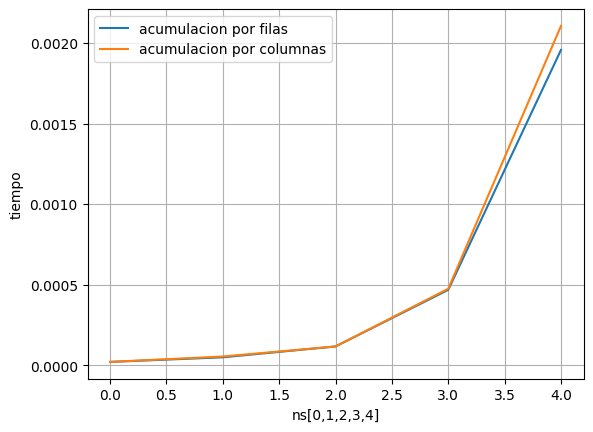

In [208]:
plt.plot([0,1,2,3,4],lista_funcion1_N_filas[:5],label='acumulacion por filas ')
plt.plot([0,1,2,3,4],lista_funcion2_N_columnas[:5],label='acumulacion por columnas')
plt.xlabel("ns[0,1,2,3,4]")
plt.ylabel("tiempo")
plt.grid()
plt.legend()

t) Presente una gráfica en la que muestre como varía el tiempo de ejecución de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

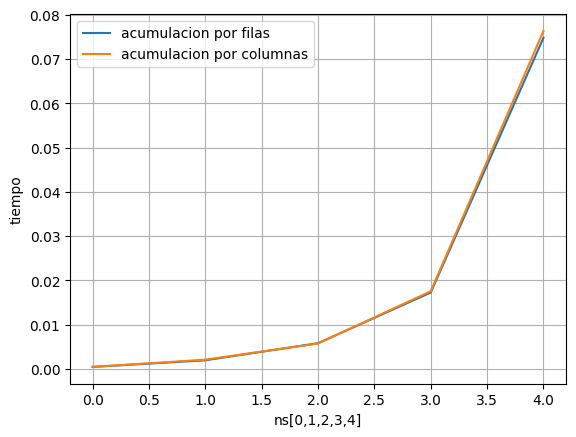

In [209]:
plt.plot([0,1,2,3,4],lista_funcion1_N_filas[3:],label='acumulacion por filas ')
plt.plot([0,1,2,3,4],lista_funcion2_N_columnas[3:],label='acumulacion por columnas')
plt.xlabel("ns[0,1,2,3,4]")
plt.ylabel("tiempo")
plt.grid()
plt.legend()

u) Presente una gráfica en la que muestre como varía el *speedup* de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia la función más lenta. (0.25 ptos)

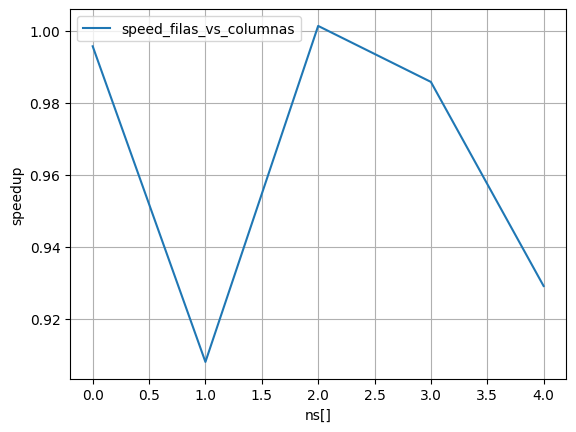

In [210]:
#Funcion más lenta: funcion que acumula en filas pues tiene mayor media de tiempo de ejecusion

speed2_1 = [i / j for i, j in zip(lista_funcion1_N_filas, lista_funcion2_N_columnas)]
plt.plot([0,1,2,3,4],speed2_1[:5],label='speed_filas_vs_columnas')

plt.xlabel("ns[]")
plt.ylabel("speedup")
plt.grid()
plt.legend()

v) Compare graficamente las implementaciones de las versiones con un solo bucle `for`, con las implementaciones de las versiones con dos bucle `for`. Presente una gráfica de tiempo de ejecución para todos los tamaños, determine cual es la más rápida y cual es la más lenta. (0.5 ptos)

[2.1469500097737182e-05, 4.729449983642553e-05, 0.00013323949997356976, 0.0004669824998018157, 0.002066124499833677, 0.004954012999860424, 0.018958725499942375, 0.09298739449968707]


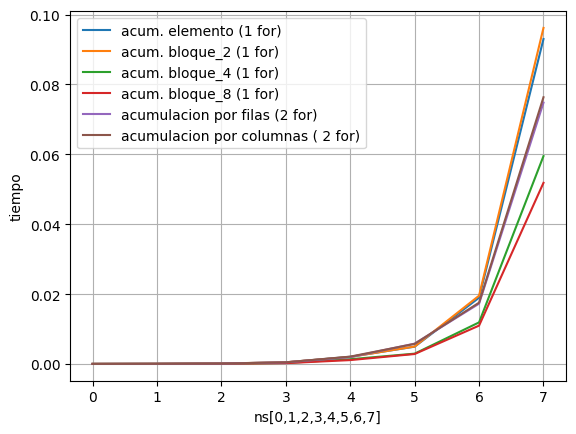

In [216]:
print(lista_funcion1_N)

plt.plot([0,1,2,3,4,5,6,7],lista_funcion1_N[:],label='acum. elemento (1 for) ')
plt.plot([0,1,2,3,4,5,6,7],lista_funcion2_N[:],label='acum. bloque_2 (1 for)')
plt.plot([0,1,2,3,4,5,6,7],lista_funcion3_N[:],label='acum. bloque_4 (1 for)')
plt.plot([0,1,2,3,4,5,6,7],lista_funcion4_N[:],label='acum. bloque_8 (1 for)')
plt.plot([0,1,2,3,4,5,6,7],lista_funcion1_N_filas[:],label='acumulacion por filas (2 for) ')
plt.plot([0,1,2,3,4,5,6,7],lista_funcion2_N_columnas[:],label='acumulacion por columnas ( 2 for)')

plt.xlabel("ns[0,1,2,3,4,5,6,7]")
plt.ylabel("tiempo")
plt.grid()
plt.legend()



w) En base al análisis del ítem (v), presente dos gráficas de *speedup* (de la función más rápida respecto de la más lenta). Una para los primeros cinco tamaños, y otra para los cinco últimos. (0.25 ptos)

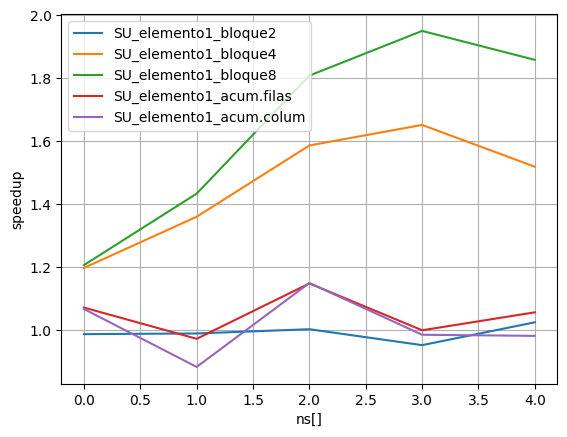

In [219]:
#Consideraremos la funcion más lenta la que amumula elemento por elemento 

speed1_2 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion2_N)]
speed1_3 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion3_N)]
speed1_4= [i / j for i, j in zip(lista_funcion1_N, lista_funcion4_N)]
speed1_5 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion1_N_filas)]
speed1_6 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion2_N_columnas)]

plt.plot([0,1,2,3,4],speed1_2[:5],label='SU_elemento1_bloque2')
plt.plot([0,1,2,3,4],speed1_3[:5],label='SU_elemento1_bloque4')
plt.plot([0,1,2,3,4],speed1_4[:5],label='SU_elemento1_bloque8')
plt.plot([0,1,2,3,4],speed1_5[:5],label='SU_elemento1_acum.filas')
plt.plot([0,1,2,3,4],speed1_6[:5],label='SU_elemento1_acum.colum')


plt.xlabel("ns[]")
plt.ylabel("speedup")
plt.grid()
plt.legend()

x) Explique sus resultados de las implementaciones con un solo bucle `for` empleando conceptos de memoria caché. (2.0 ptos)

In [ ]:
#Los resultados se podrían explicar mediante los conceptos de localidad temporal y espacial, por ejemplo, 
#nos damos cuenta que el primer nivel de la caché tiene un tamaño de 32768 bytes y el tamaño de los bloques 
#es de 64 bytes por lo tanto tendría 512 bloques, lo que nos podría interesar aquí es que  el tamaño de los
#bloques es de 64 bytes y las variables de alta precision tipo double ocupan 8 bytes, por lo tanto cada bloque
#tendría 8 elementos, estos 8 elementos nos ayudan a explicar la localidad espacial debido a cada función y
#saber cual es la más eficiente.
#La funcion más eficiente es la funcion4(acumulacion por bloques de 8) esto se debe a que goza de una fuerte
# localidad espacial(tendencia a acceder a direcciones de memoria cercanas a una dirección de memoria recientemente
#accedida) ya que aparte de llamar al primer elemento de cada elemento tambien se llama a sus vecinos
# los cuales se encuentran en la caché, además de que realizan un menor número de accesos a la memoria caché
#ya que coge los arreglos en bloques de 8, tamaño de un bloque. Las otras funciones demoran más porque
#se tiende a acceder más a la memoria caché porque cogen los valores en menor cantidad,con lo cual aumenta los tiempos
#de ejecusion y sus respectivas medianas.


y) Explique sus resultados de las implementaciones con dos bucle `for` empleando conceptos de memoria caché. (2.0 ptos)

In [ ]:
#De manera análoga se puede explicar las funciones que acumulan en filas y columnas. De estas dos funciones la que tiene
#menor tiempo de ejecusión es la que acumula por filas, esto también se puede explicar mediante el concepto de localidad
#espacial y la cantidad elementos que puede almacenar los bloques de la memoria caché. Al acumular en filas se accede directamente
#a los elementos que están muy cercanos por ejemplo al acceder a arr[0] este se va a la caché con todo su bloque hasta arr[7], entonces
#al ir acumulando  por filas se tenderá a acceder en menor cantidad a la caché pues los elementos están juntos. En cambio al acumular 
# por columnas los elementos no están juntos pues están a una distancia de N elementos para poder coger el siguiente elementos y así sucesivamente,
# por ejemplo para N=5, la acumulación de la primera columna sería arr[0]+ arr[5]+ arr[10] + arr[15]+ arr[20]+ arr[25] y así para todas las columnas
# entonces se tenderá a acceder a la memoria caché más veces que en el caso de filas pues elementos están más separados.

z) ¿Qué implementación para sumar todos los elementos de una matriz es más eficiente en términos de tiempo de ejecución? ¿Por qué? Explique empleando conceptos de memoria caché. (1.0 pto)

In [ ]:
#La mejor implementación es la que acumula por bloques en 8 con un solo for pues además de gozar del concepto de localidad espacial tambien 
#contiene un solo for con lo cual se accede en menor cantidad a la memoria caché. A diferencia de la función que acumula por filas que es similar
# la diferencia está en que está función usa 2 for con lo cual aumenta el tiempo de ejecusión. Y a diferencia de todas las funciones pues en las 
#que usan un solor for es mucho mejor coger los elementos en bloques de 8 a coger en 4 o en 2 o elemento por elementos pues hace que se acceda
#en mayor cantidad, y a diferencia de las funciones que cogen en filas y columnas, estas funciones al usar 2 for aumentan significativamente los 
#tiempo sde ejecusión. >< UNU